In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

C:\Users\lenov\AppData\Local\Temp\ipykernel_18632\23843451.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [16]:
# Load the dataset
df = pd.read_csv("data/Climate_Change_Indicators.csv") # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
year_data = df.groupby('Year')[["Global Average Temperature (°C)","CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"]].mean().reset_index()
year_data.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,8.978659
1,1901,14.485343,349.757140,8.947272
2,1902,14.476262,349.299686,9.035554
3,1903,14.492360,349.644375,9.056501
4,1904,14.494241,349.537032,8.990691


In [18]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Descriptive statistics for each variable
# describe used for mean, median, standard devition
print(year_data[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"]].describe())

       Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count                       124.000000               124.000000   
mean                         14.499538               350.028626   
std                           0.009960                 0.456535   
min                          14.474559               348.642249   
25%                          14.492782               349.691692   
50%                          14.499496               350.022334   
75%                          14.504872               350.367023   
max                          14.527762               351.003294   

       Arctic Ice Area (million km²)  
count                     124.000000  
mean                        9.000886  
std                         0.037547  
min                         8.893453  
25%                         8.978851  
50%                         8.998274  
75%                         9.027985  
max                         9.101611  


2. Univariate Analysis

Univariate Analysis in Histogra, boxplot, plot, displot and kdeplot

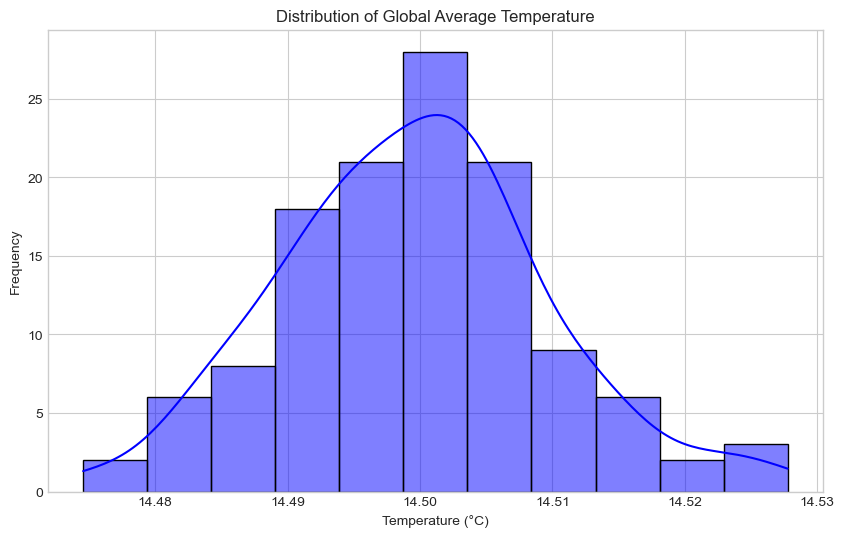

In [ ]:
#Histogram for temperature distributions
plt.figure(figsize=(10, 6))
sns.histplot(year_data['Global Average Temperature (°C)'], kde=True, color='blue')
plt.title('Distribution of Global Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Line plot for temperature over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Global Average Temperature (°C)', data=year_data, color='blue')
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Line Plot for CO2 Concentration over time

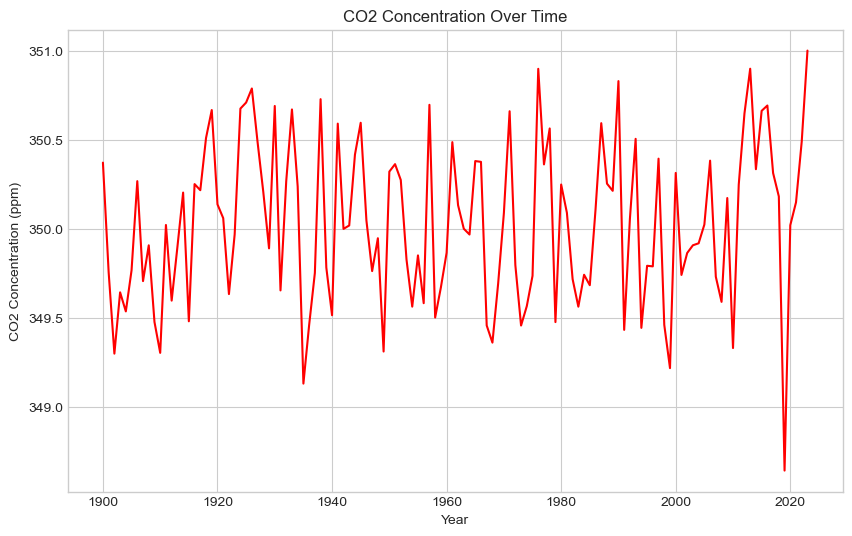

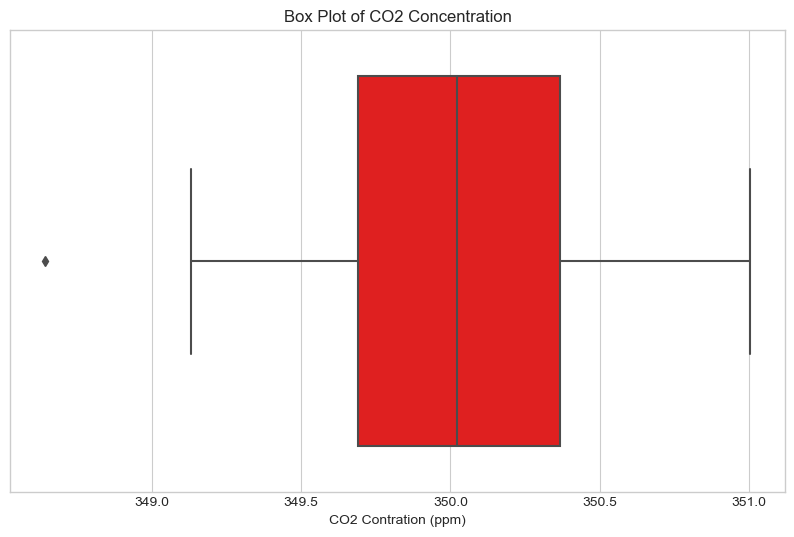

In [ ]:
# Line plot for CO2 concentration over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CO2 Concentration (ppm)', data=year_data, color='red')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.grid(True)
plt.show()

#Box plot for CO2 concentrations
plt.figure(figsize=(10, 6))
sns.boxplot(x=year_data['CO2 Concentration (ppm)'], color='red')
plt.title('Box Plot of CO2 Concentration')
plt.xlabel('CO2 Contration (ppm)')
plt.show()

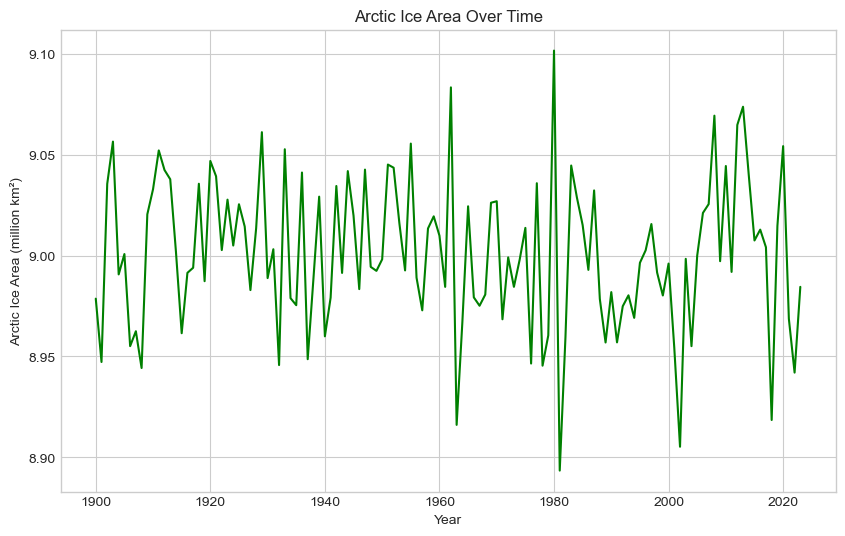

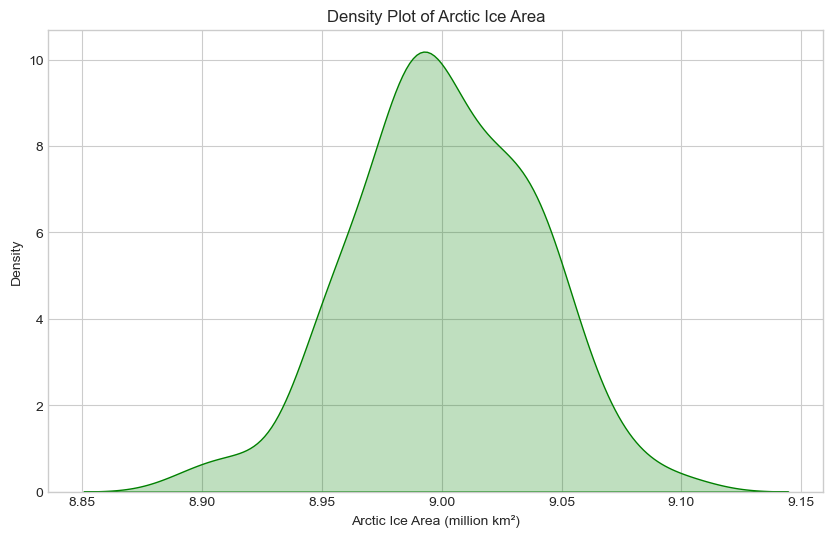

In [8]:
# Line plot for Arctic ice area over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Arctic Ice Area (million km²)', data=year_data, color='green')
plt.title('Arctic Ice Area Over Time')
plt.xlabel('Year')
plt.ylabel('Arctic Ice Area (million km²)')
plt.grid(True)
plt.show()

# Density plot for Arctic ice area
plt.figure(figsize=(10, 6))
sns.kdeplot(year_data['Arctic Ice Area (million km²)'], color='green', fill=True)
plt.title('Density Plot of Arctic Ice Area')
plt.xlabel('Arctic Ice Area (million km²)')
plt.ylabel('Density')
plt.show()

3. Bivariate Analysis

Explore relationships between pairs of climate variables

In [9]:
# Calculate correlation matrix
correlation_matrix = year_data[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"]].corr()
print(correlation_matrix)

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  \
Global Average Temperature (°C)                -0.067980   
CO2 Concentration (ppm)                         1.000000   
Arctic Ice Area (million km²)                   0.009986   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Arctic Ice Area (million km²)                         1.000000  


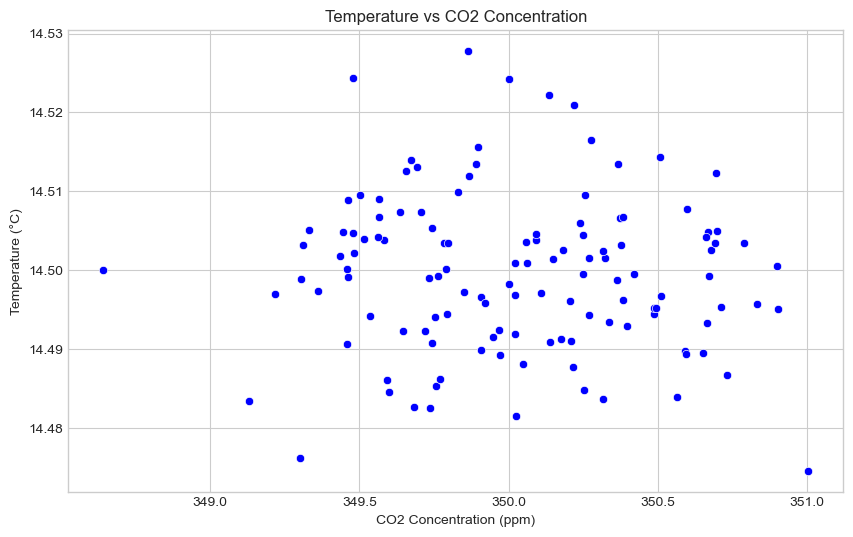

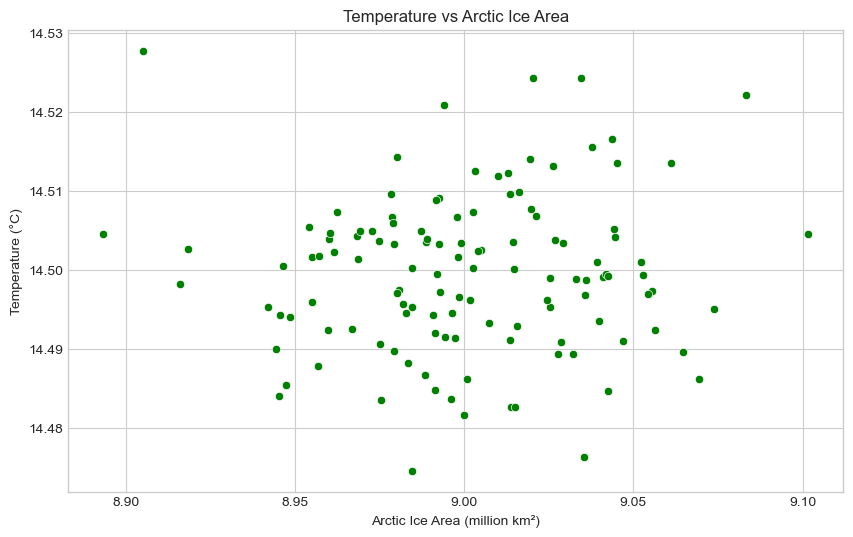

In [10]:
# Scatter plot: Temperature vs CO2 Concentration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO2 Concentration (ppm)', y='Global Average Temperature (°C)', data=year_data, color='blue')
plt.title('Temperature vs CO2 Concentration')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Scatter plot: Temperature vs Arctic Ice Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arctic Ice Area (million km²)', y='Global Average Temperature (°C)', data=year_data, color='green')
plt.title('Temperature vs Arctic Ice Area')
plt.xlabel('Arctic Ice Area (million km²)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

c:\Users\lenov\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


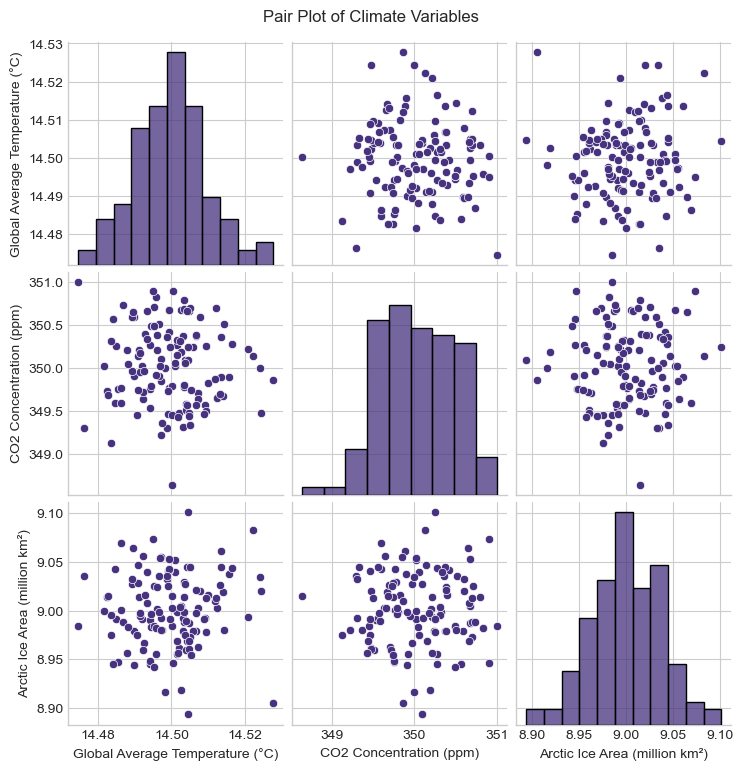

In [11]:
# Pair plot for all variables
sns.pairplot(year_data[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"]])
plt.suptitle('Pair Plot of Climate Variables', y=1.02)
plt.show()

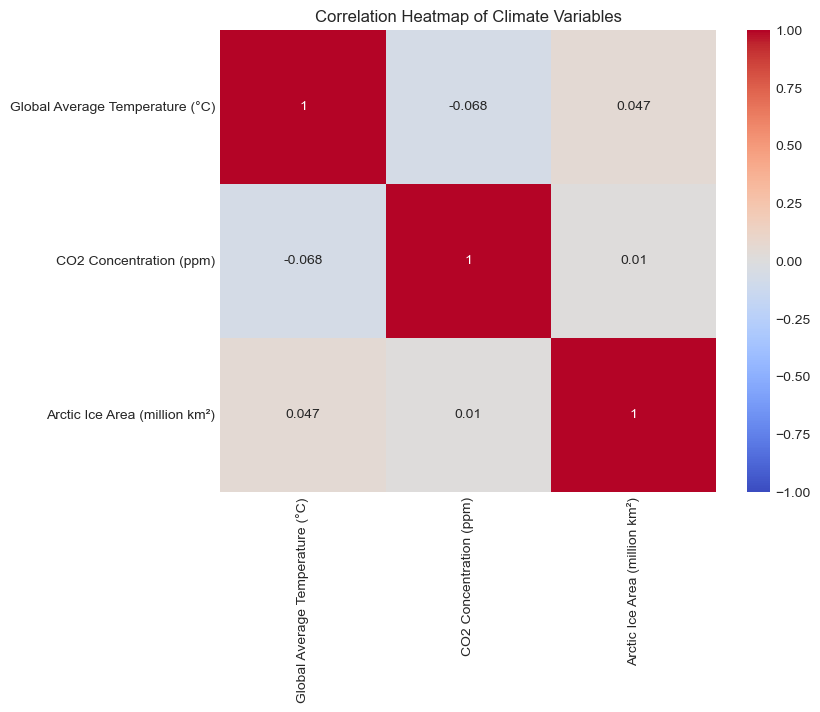

In [12]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

4. Multivariate Analysis

Investigate relationships among three or more variables

Pair Plot on Multivariate Analysis

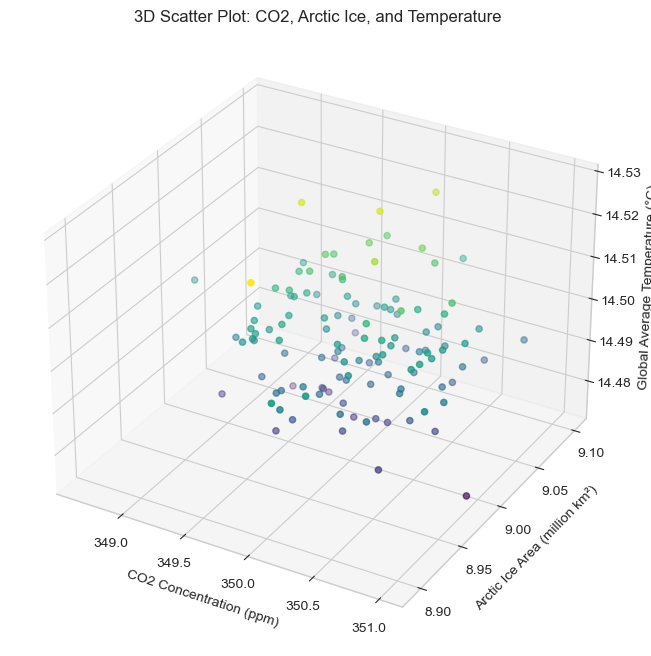

c:\Users\lenov\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


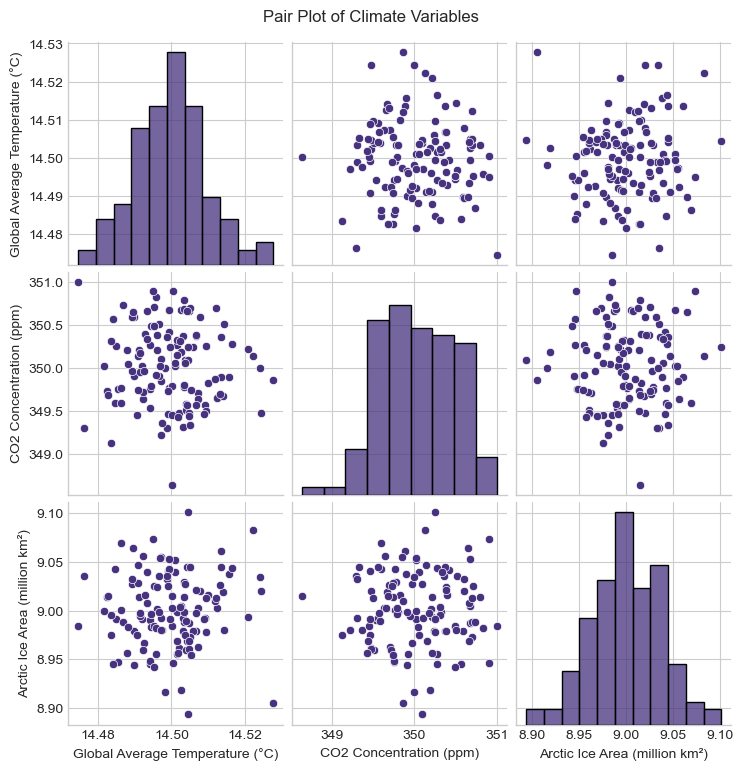

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Add a decade column for coloring
year_data['Decade'] = (year_data['Year'] // 10) * 10

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    year_data["CO2 Concentration (ppm)"],
    year_data["Arctic Ice Area (million km²)"],
    year_data["Global Average Temperature (°C)"],
    c=year_data["Global Average Temperature (°C)"],
    cmap='viridis'
)
ax.set_xlabel('CO2 Concentration (ppm)')
ax.set_ylabel('Arctic Ice Area (million km²)')
ax.set_zlabel('Global Average Temperature (°C)')
plt.title('3D Scatter Plot: CO2, Arctic Ice, and Temperature')
plt.show()

# Pair Plot
sns.pairplot(year_data[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"]])
plt.suptitle('Pair Plot of Climate Variables', y=1.02)
plt.show()
# Pair plot with hue
sns.pairplot(year_data, vars=["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"], hue='Decade', palette='viridis')
plt.suptitle('Pair Plot with Decade as Hue', y=1.02)
plt.show()

5. Conclusion and Insights

Summarize your findings and discuss their implications.